In [565]:
import pandas
import numpy as np
import statsmodels.tsa.holtwinters
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


## Чтение данных


In [566]:
df = pandas.read_csv('Top10VideoGameStocks.csv', index_col=0)
df = df[df['Company'] == 'Sony Interactive Entertainment']
df

,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,
2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000
2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000
2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000
2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000
2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500
...,...,...,...,...,...,...,...,...,...
2024-06-01,Sony Interactive Entertainment,SONY,JPY,16.625999,17.497999,15.860000,16.990000,16.990000,83581000
2024-07-01,Sony Interactive Entertainment,SONY,JPY,17.024000,19.294001,17.004000,17.718000,17.718000,90385000
2024-08-01,Sony Interactive Entertainment,SONY,JPY,17.346001,19.544001,15.956000,19.511999,19.511999,90948500



## Преобразование данных


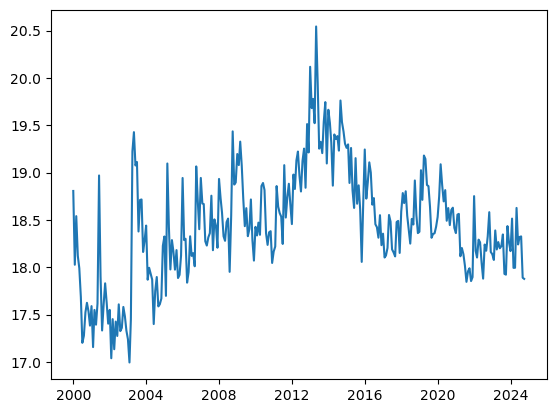

In [567]:
volumes = np.log(df['Volume'].to_list())

volumes = pandas.Series(
    volumes, 
    index=pandas.date_range(start='1/1/2000', periods=len(volumes), freq='MS')
)
plt.plot(volumes.index, volumes)
plt.show()


## Разделение данных на тренировочную и тестовую выборки


In [568]:
train = volumes[144:290]
test = volumes[290:]
train

2012-01-01    18.456173
2012-02-01    18.979196
2012-03-01    18.827045
2012-04-01    19.129472
2012-05-01    19.222276
                ...    
2023-10-01    17.922031
2023-11-01    18.434761
2023-12-01    18.263565
2024-01-01    18.170738
2024-02-01    18.514121
Freq: MS, Length: 146, dtype: float64


## Тренировка модели


In [569]:
fitted_model = statsmodels.tsa.holtwinters.ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()


## Прогнозирование

In [570]:
test_predictions = fitted_model.forecast(len(test))
test_predictions

2024-03-01    18.371884
2024-04-01    18.386033
2024-05-01    18.479069
2024-06-01    18.300445
2024-07-01    18.194043
2024-08-01    18.189137
2024-09-01    18.166094
2024-10-01    18.209885
Freq: MS, dtype: float64

## RMSE

In [571]:
metrics.root_mean_squared_error(test, test_predictions)

0.2604586936231435

## R^2

In [572]:
metrics.r2_score(test, test_predictions)

-0.11843736777124092

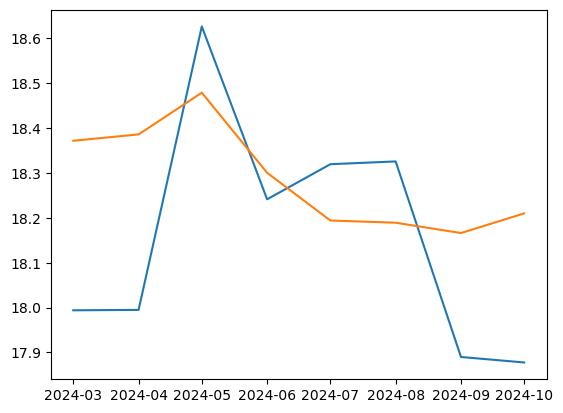

In [573]:
plt.plot(test.index, test)
plt.plot(test_predictions.index, test_predictions)
plt.show()